**a. Plot co-occurrence word embeddings**

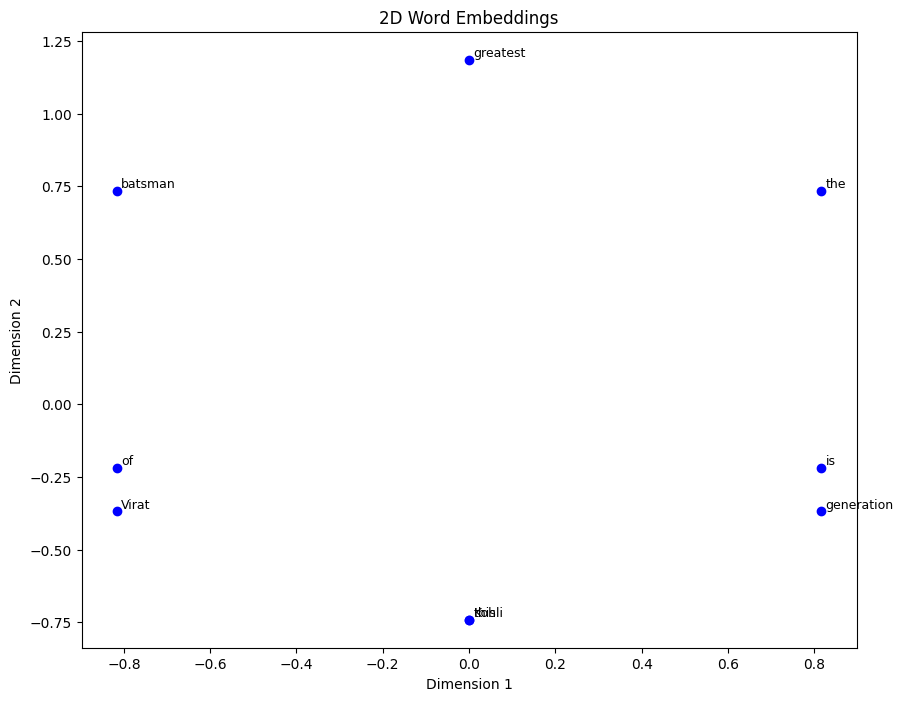

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def distinct_words(corpus):
    return list(set(corpus))

def co_occurrence_matrix(corpus, window_size=4):
    words = distinct_words(corpus)
    word_to_index = {word: i for i, word in enumerate(words)}
    num_words = len(words)
    co_matrix = np.zeros((num_words, num_words), dtype=int)

    for i, target_word in enumerate(corpus):
        target_index = word_to_index[target_word]

        start = max(0, i - window_size)
        end = min(len(corpus), i + window_size + 1)

        context_words = [corpus[j] for j in range(start, end) if j != i]
        for context_word in context_words:
            context_index = word_to_index[context_word]
            co_matrix[target_index, context_index] += 1

    return co_matrix, words

def dimensionality_reduction(co_matrix, k=2):
    pca = PCA(n_components=k)
    embeddings = pca.fit_transform(co_matrix)
    return embeddings

def plot_embeddings(embeddings, words):
    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        plt.scatter(embeddings[i, 0], embeddings[i, 1], marker='o', color='blue')
        plt.text(embeddings[i, 0] + 0.01, embeddings[i, 1] + 0.01, word, fontsize=9)

    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('2D Word Embeddings')
    plt.show(block=True)

corpus = ["Virat", "Kohli", "is", "the", "greatest", "batsman", "of", "this", "generation"]
co_matrix, words = co_occurrence_matrix(corpus)
embeddings = dimensionality_reduction(co_matrix, k=2)

plot_embeddings(embeddings, words)


**b. Write a method to work out the distinct words (word types) that occur in the corpus.**

In [30]:
corpus = ["Virat", "Kohli", "is", "the", "greatest", "batsman", "of", "this", "generation"]
distinct_words_list = distinct_words(corpus)
print(distinct_words_list)

['this', 'of', 'is', 'Kohli', 'greatest', 'the', 'batsman', 'generation', 'Virat']


**c. Write a method that constructs a co-occurrence matrix for a certain window-size n (with a default of 4), considering words n before and n after the word in the center of the window ( numpy library will be useful for vector, matrix, etc)**

In [31]:
import numpy as np

def distinct_words(corpus):
    return list(set(corpus))

corpus = ["Virat", "Kohli", "is", "the", "greatest", "batsman", "of", "this", "generation"]

words = distinct_words(corpus)

co_matrix, words = co_occurrence_matrix(corpus)

print("Co-occurrence Matrix:")
print(co_matrix)
print("\nDistinct Words:")
print(words)


Co-occurrence Matrix:
[[0 1 0 0 1 1 1 1 0]
 [1 0 1 0 1 1 1 1 0]
 [0 1 0 1 1 1 1 0 1]
 [0 0 1 0 1 1 1 0 1]
 [1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 0 1 0 1]
 [1 1 1 1 1 1 0 1 0]
 [1 1 0 0 1 0 1 0 0]
 [0 0 1 1 1 1 0 0 0]]

Distinct Words:
['this', 'of', 'is', 'Kohli', 'greatest', 'the', 'batsman', 'generation', 'Virat']


**d. Construct a method that performs dimensionality reduction on the matrix to produce k-dimensional embeddings**

Reduced Embeddings:
[[-1.64323721e-14 -7.41503955e-01]
 [-8.16496581e-01 -2.17766567e-01]
 [ 8.16496581e-01 -2.17766567e-01]
 [ 2.19576298e-14 -7.41503955e-01]
 [ 1.20768509e-14  1.18526188e+00]
 [ 8.16496581e-01  7.34814397e-01]
 [-8.16496581e-01  7.34814397e-01]
 [ 8.16496581e-01 -3.68174816e-01]
 [-8.16496581e-01 -3.68174816e-01]]


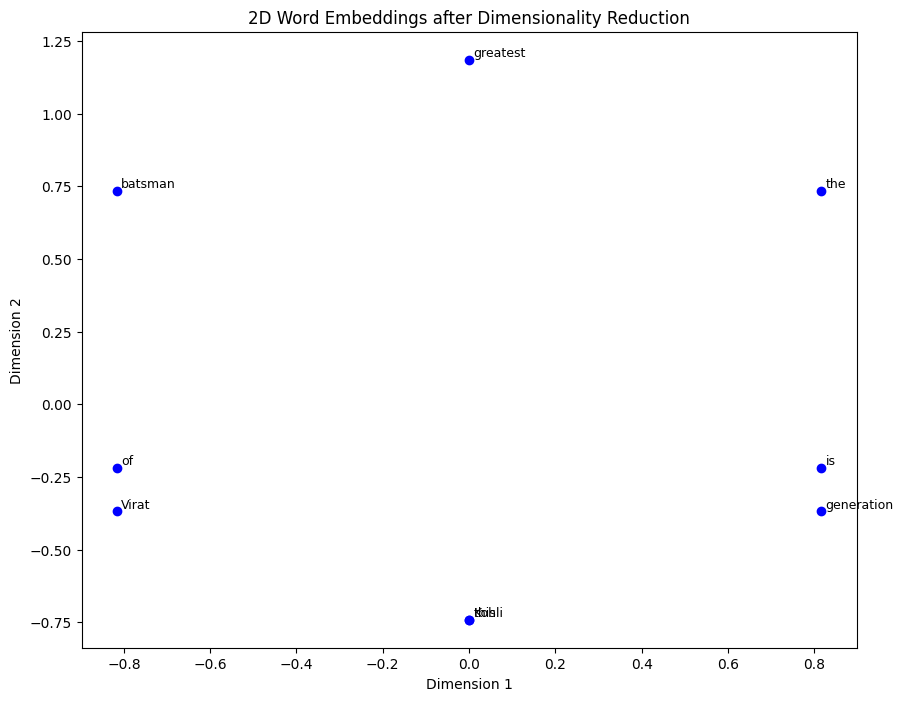

In [32]:
import numpy as np
import matplotlib.pyplot as plt

corpus = ["Virat", "Kohli", "is", "the", "greatest", "batsman", "of", "this", "generation"]

co_matrix, words = co_occurrence_matrix(corpus)

embeddings = dimensionality_reduction(co_matrix, k=2)

print("Reduced Embeddings:")
print(embeddings)

plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    plt.scatter(embeddings[i, 0], embeddings[i, 1], marker='o', color='blue')
    plt.text(embeddings[i, 0] + 0.01, embeddings[i, 1] + 0.01, word, fontsize=9)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Word Embeddings after Dimensionality Reduction')
plt.show()


**e.  write a function to plot a set of 2D vectors in 2D space.**

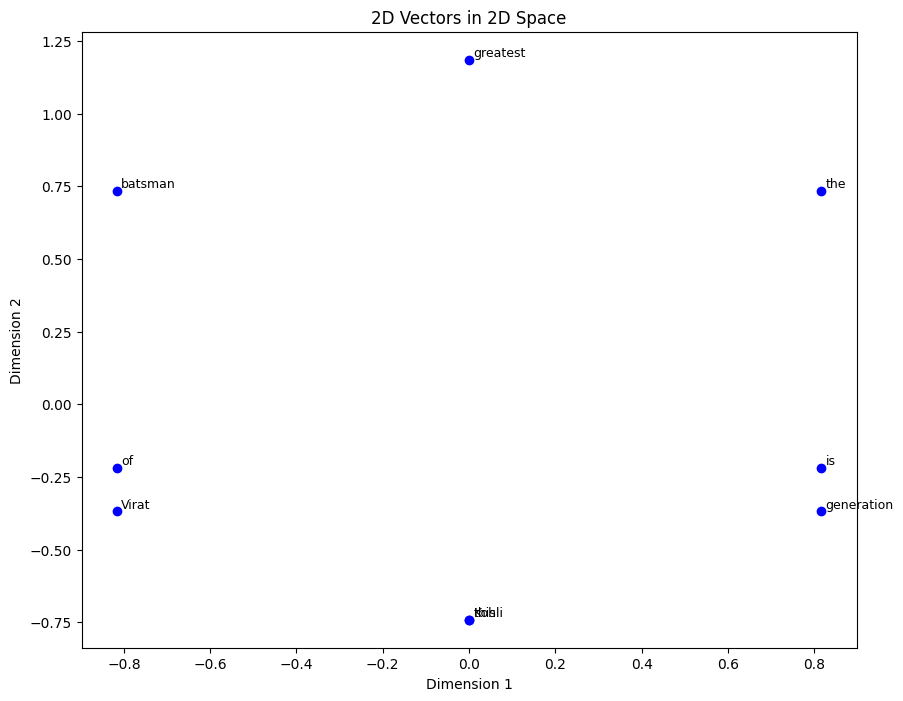

In [33]:
import numpy as np

from sklearn.decomposition import PCA

corpus = ["Virat", "Kohli", "is", "the", "greatest", "batsman", "of", "this", "generation"]

co_matrix, words = co_occurrence_matrix(corpus)
embeddings = dimensionality_reduction(co_matrix, k=2)
plot_2d_vectors(embeddings, words)
